## Batch Mode
Steps: (for any particular character)
1. Load Hanzi data (HandImage)
    a. For each stroke determine type and position (StrokeFit)
2. Load character image
3. Convert each stroke from Hanzi format to Arial format
4. Map each Arial stroke based on character image (various methods could work, anchor points is current best)
5. Readjust if needed
6. Save to data folder.

Note currently the geometry we're using is origin is top-left corner and max dimensions would be bottom right.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import HandImage as hi
import StrokeFit as sf
from StrokeDef import StrokeType #needed for loading object properly
import StrokeDef as sd

from FitDef import FitData
import FitDef as fd

In [2]:
def fitChar(character, printOut=False):
    strokeData = hi.getStrokeData(character)
    if(strokeData is None):
        print(f"No hanzi data found for {character}! Skipping...")
        return False #failed
    if(printOut):
        figChar, axChar = hi.plotChar(character)
    strokeDict = sd.loadStrokeDict()
    fits = sf.getFits(strokeData, strokeDict)
    if(printOut):
        figFit, axFit = sf.graphFits(strokeData, strokeDict, fits)

    handDims = np.array([1000, 1000]) #this appears to be default always
    arialDims = np.array([1000,1000]) #should be large enough for our purposes
    arialFits = sf.mapFits(fits, handDims, arialDims, pad=.1) #.1 padding on both sides

    fitData = FitData()
    fitData.set(character, arialFits, arialDims)
    fd.saveFits(fitData)
    print(f"{character} fitted and saved!")
    return True

位 fitted and saved!


True

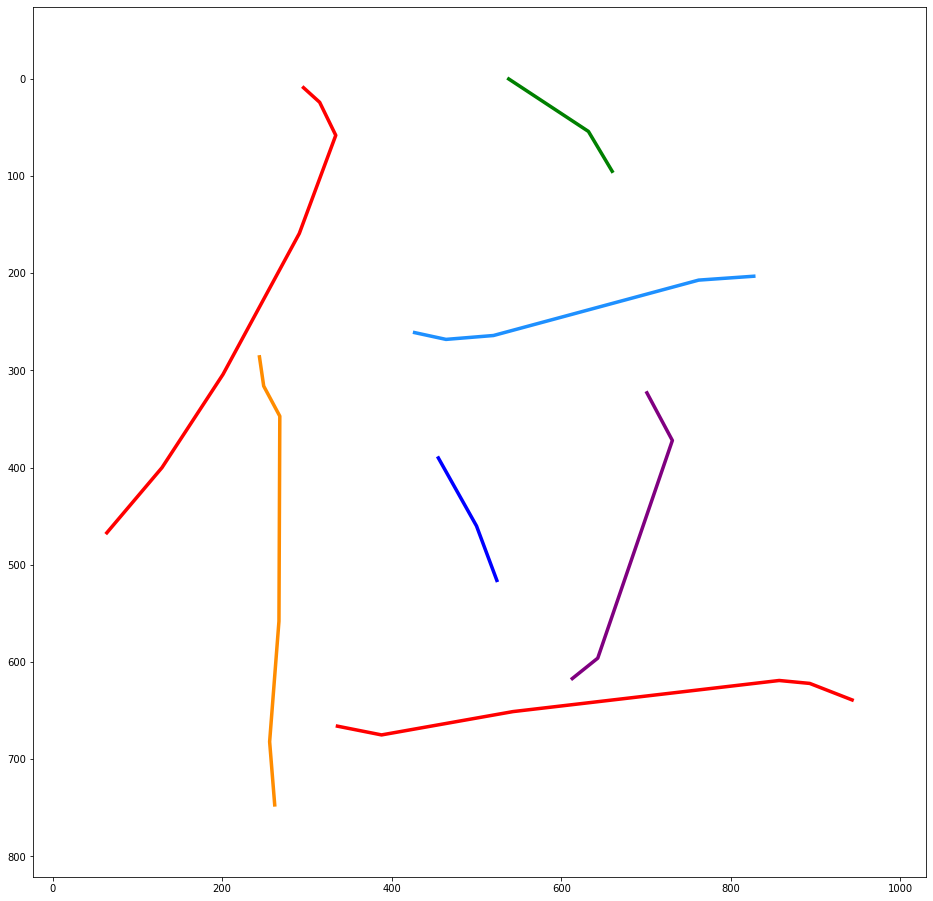

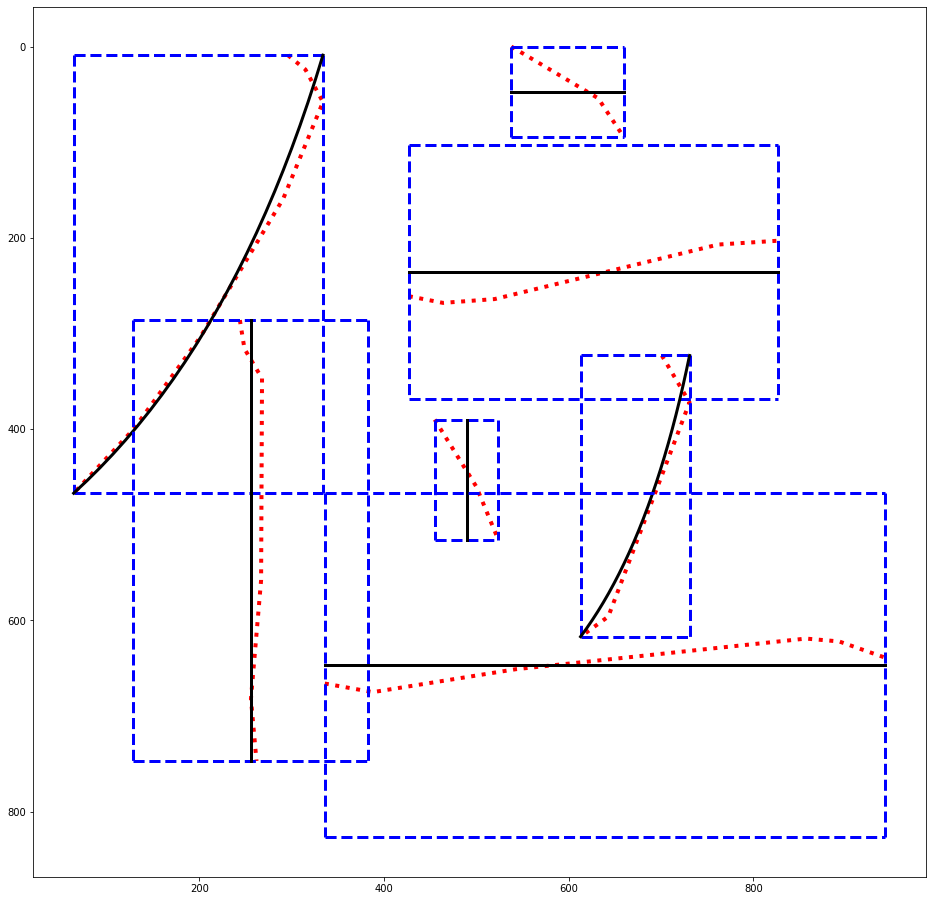

In [3]:
character = '\u4f4d'
fitChar(character, printOut=True)

In [3]:
character = '\u4f4d' #\u4f4d seems the firt character hanzi writer has available

charsDone = 0
i = 0
while(charsDone < 100):
    currChar = chr(ord(character)+i)
    if(fitChar(currChar)):
        charsDone += 1
    i += 1

位 fitted and saved!
低 fitted and saved!
住 fitted and saved!
佐 fitted and saved!
佑 fitted and saved!
No hanzi data found for 佒! Skipping...
体 fitted and saved!
佔 fitted and saved!
何 fitted and saved!
No hanzi data found for 佖! Skipping...
佗 fitted and saved!
佘 fitted and saved!
余 fitted and saved!
佚 fitted and saved!
佛 fitted and saved!
作 fitted and saved!
佝 fitted and saved!
佞 fitted and saved!
佟 fitted and saved!
你 fitted and saved!
No hanzi data found for 佡! Skipping...
No hanzi data found for 佢! Skipping...
佣 fitted and saved!
佤 fitted and saved!
佥 fitted and saved!
No hanzi data found for 佦! Skipping...
佧 fitted and saved!
No hanzi data found for 佨! Skipping...
佩 fitted and saved!
No hanzi data found for 佪! Skipping...
No hanzi data found for 佫! Skipping...
佬 fitted and saved!
No hanzi data found for 佭! Skipping...
No hanzi data found for 佮! Skipping...
佯 fitted and saved!
佰 fitted and saved!
No hanzi data found for 佱! Skipping...
No hanzi data found for 佲! Skipping...
佳 fitted and

In [6]:
#example of loading a fit
fitData = fd.loadFits("俾")
print(fitData.character)
print(fitData.size)
for fit in fitData.fits:
    print(fit)

俾
[1000 1000]
Stroke type C0. x bounds: [ 59 352], y bounds: [ 31 492].
Stroke type D1. x bounds: [123. 378.], y bounds: [322 787].
Stroke type C0. x bounds: [506 594], y bounds: [  0 168].
Stroke type D1. x bounds: [403 496], y bounds: [179 450].
Stroke type D0. x bounds: [451 795], y bounds: [149 424].
Stroke type D0. x bounds: [512 691], y bounds: [237. 353.].
Stroke type D0. x bounds: [512 702], y bounds: [330. 470.].
Stroke type C1. x bounds: [468 609], y bounds: [194 565].
Stroke type D0. x bounds: [318 947], y bounds: [388. 761.].
Stroke type D1. x bounds: [516. 774.], y bounds: [465 904].
